In [1]:
#Import numpy and pandas
import numpy as np
import pandas as pd

In [2]:
#Import visualization libraries and set %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Read in the csv file as a dataframe called df
df = pd.read_csv('911.csv')

In [6]:
#Check the info() of the df
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [72]:
#top 2 pincodes with most calls
df['zip'].value_counts().head(2)

19401.0    6979
19464.0    6643
Name: zip, dtype: int64

In [73]:
#What are the top 2 townships (twp) for 911 calls?
df['twp'].value_counts().head(2)

LOWER MERION    8443
ABINGTON        5977
Name: twp, dtype: int64

In [14]:
#top 5 type of emergency
df['title'].value_counts().head(5)

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
Name: title, dtype: int64

In [15]:
#Total no of different emergency
df['title'].nunique()

110

In [21]:
#How many common Reason for a 911 call ?
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [23]:
df['reason'].nunique()

3

In [24]:
#what are the common Reasons for a 911 call ?
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='count'>

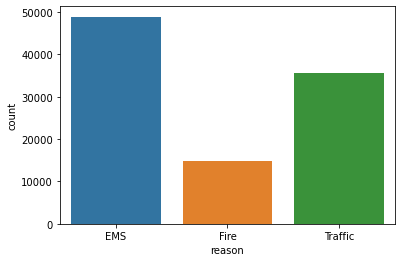

In [25]:
#use seaborn to create a countplot of 911 calls by Reason
sns.countplot(x = 'reason', data = df)

In [26]:
#timeStamp column
df['timeStamp']

0        2015-12-10 17:40:00
1        2015-12-10 17:40:00
2        2015-12-10 17:40:00
3        2015-12-10 17:40:01
4        2015-12-10 17:40:01
                ...         
99487    2016-08-24 11:06:00
99488    2016-08-24 11:07:02
99489    2016-08-24 11:12:00
99490    2016-08-24 11:17:01
99491    2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: object

In [32]:
df['timeStamp'].iloc[0]

'2015-12-10 17:40:00'

In [33]:
# what is the data type
type(df['timeStamp'].iloc[0])

str

In [34]:
#create 3 new columns called hour, month, and dayofweek
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [38]:
df['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:40:00')

In [39]:
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)

In [40]:
df['month'] = df['timeStamp'].apply(lambda time: time.month)

In [41]:
df['Day'] = df['timeStamp'].apply(lambda time: time.dayofweek)

<AxesSubplot:xlabel='Day', ylabel='count'>

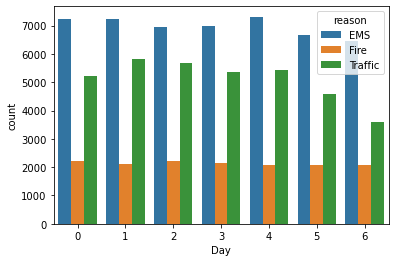

In [42]:
#create a countplot of the Day with the hue based off of the Reason column.
sns.countplot(x = 'Day', data = df, hue = 'reason')

<AxesSubplot:xlabel='month', ylabel='count'>

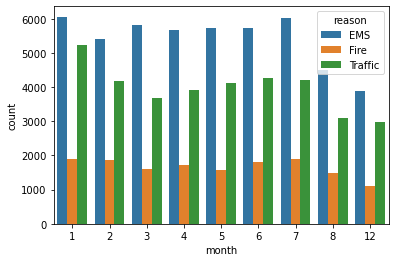

In [45]:
#create a countplot of the month with the hue based off of the Reason column.
sns.countplot(x = 'month', data = df, hue = 'reason')

In [49]:
#create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.
bymonth = df.groupby('month').count()

In [53]:
bymonth.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,Day
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467


<AxesSubplot:xlabel='month'>

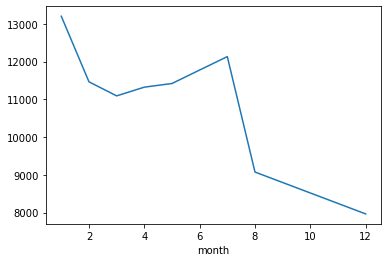

In [54]:
#create a simple plot off of the dataframe indicating the count of calls per month.
bymonth['twp'].plot()

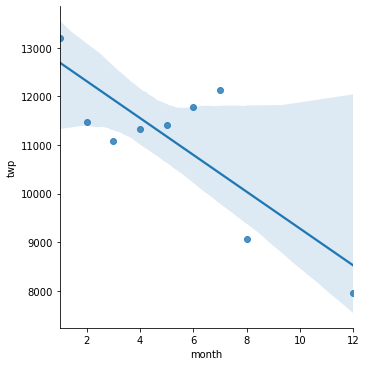

In [58]:
#use seaborn's lmplot() to create a linear fit on the number of calls per month
sns.lmplot(x = 'month', y = 'twp',data = bymonth.reset_index())

In [61]:
#Create a new column called 'Date' that contains the date from the timeStamp column
df['date'] = df['timeStamp'].apply(lambda t:t.date())

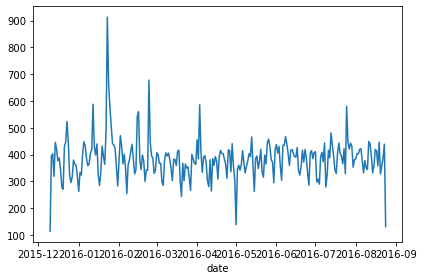

In [65]:
#Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.
df.groupby('date').count()['twp'].plot()
plt.tight_layout()

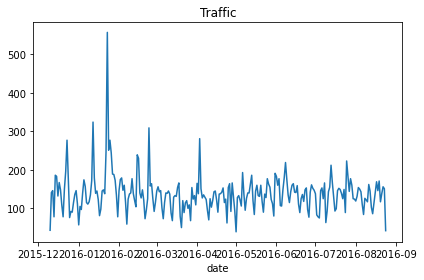

In [68]:
#recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call
# reason = traffic
df[df['reason']=='Traffic'].groupby('date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

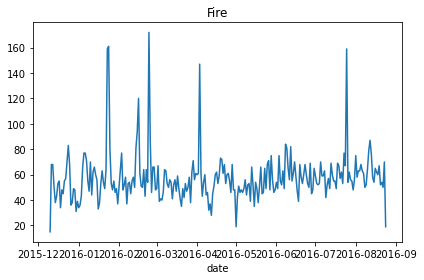

In [70]:
# reason = Fire
df[df['reason']=='Fire'].groupby('date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

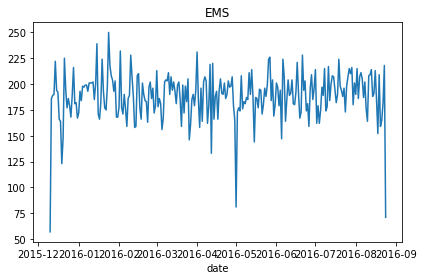

In [71]:
#reason = EMS
df[df['reason']=='EMS'].groupby('date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()
